<a href="https://colab.research.google.com/github/MozaSuryaPutra/UTS_PDT_AB_KELOMPOK-ORANG-FRIENDLY/blob/main/NO2UTSPDT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Masukkan gambar huruf.jpg ke media dulu

In [5]:
import cv2
import matplotlib.pyplot as plt

# Masukkan atau memuat gambar
image = cv2.imread('../media/huruf.jpg')

Number of objects detected: 26


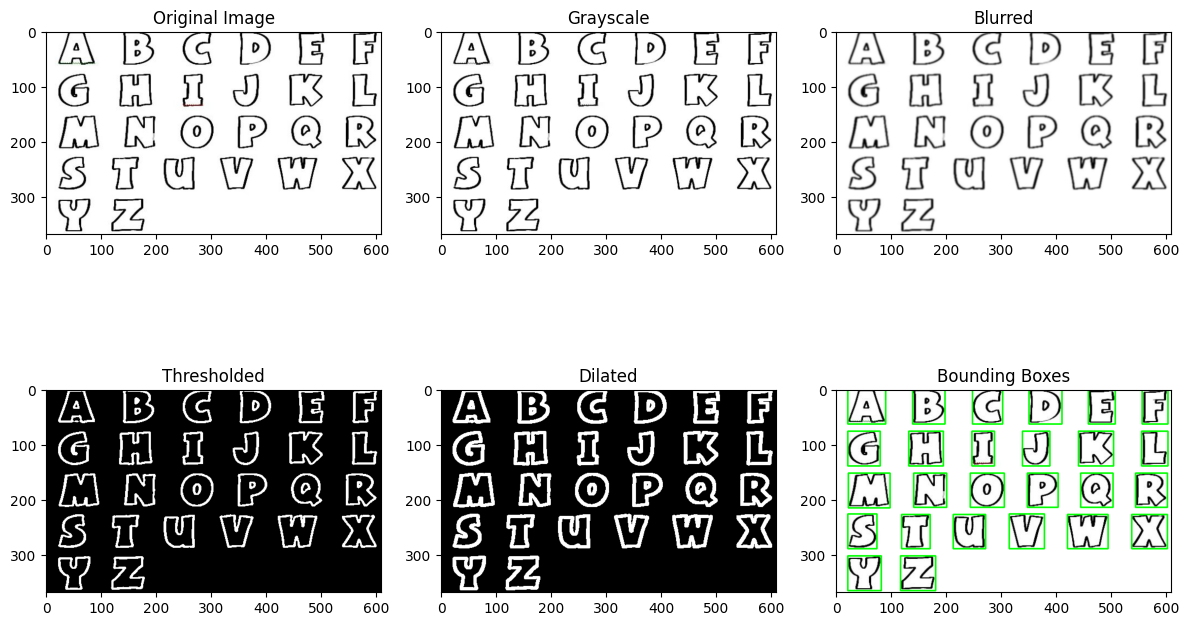

In [6]:
# Konversikan ke grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# menerapkan gaussian blur
blur = cv2.GaussianBlur(gray, (5, 5), 0)
# Menerapkan ambang adaptif
thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 4)

# Dilatasi citra ambang
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
dilated = cv2.dilate(thresh, kernel, iterations=1)

# Menemukan kontur
(cnt, _) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Cetak jumlah kontur
print("Number of objects detected:", len(cnt))

# Gambar kotak pembatas
bounding_box_image = image.copy()
for c in cnt:
    x, y, w, h = cv2.boundingRect(c)
    cv2.rectangle(bounding_box_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Visualisasikan langkah - langkah
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(2, 3, 2)
plt.imshow(gray, cmap='gray')
plt.title('Grayscale')

plt.subplot(2, 3, 3)
plt.imshow(blur, cmap='gray')
plt.title('Blurred')

plt.subplot(2, 3, 4)
plt.imshow(thresh, cmap='gray')
plt.title('Thresholded')

plt.subplot(2, 3, 5)
plt.imshow(dilated, cmap='gray')
plt.title('Dilated')

plt.subplot(2, 3, 6)
plt.imshow(cv2.cvtColor(bounding_box_image, cv2.COLOR_BGR2RGB))
plt.title('Bounding Boxes')

plt.tight_layout()
plt.show()
